


    

 Objective: predict who is likely to cancel their credit card by building and evaluating a classification model.

Steps performed:

1. Exploratory Data Analysis (EDA)
2. Data Preparation
3. Model Building
4. Performance Evaluation
5. Model Selection




## Data Discovery

### Data Description
* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

### Importing Libraries

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    #plot_confusion_matrix,
    classification_report,
    precision_recall_curve
)
from sklearn import metrics

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

### Loading Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving BankChurners.csv to BankChurners.csv


In [ ]:
churn = pd.read_csv("BankChurners.csv")

In [ ]:
# Checking the number of rows and columns in the data
churn.shape

(10127, 21)

* The dataset has 10127 rows and 21 columns

### Data Overview

In [ ]:
# let's create a copy of the data
data = churn.copy()

In [ ]:
# let's view the first 5 rows of the data
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.00000,777,11914.00000,1.33500,1144,42,1.62500,0.06100
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.00000,864,7392.00000,1.54100,1291,33,3.71400,0.10500
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.00000,0,3418.00000,2.59400,1887,20,2.33300,0.00000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.00000,2517,796.00000,1.40500,1171,20,2.33300,0.76000
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.00000,0,4716.00000,2.17500,816,28,2.50000,0.00000


In [ ]:
# let's view the last 5 rows of the data
data.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.00000,1851,2152.00000,0.70300,15476,117,0.85700,0.46200
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.00000,2186,2091.00000,0.80400,8764,69,0.68300,0.51100
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.00000,0,5409.00000,0.81900,10291,60,0.81800,0.00000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.00000,0,5281.00000,0.53500,8395,62,0.72200,0.00000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.00000,1961,8427.00000,0.70300,10294,61,0.64900,0.18900


In [ ]:
# let's check the data types of the columns in the
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

* There are no null values in the Education_Level and Marital_Status
* 5 columns are of object type rest all are numerical.

In [ ]:
# let's check for duplicate values in the data
data.duplicated().sum()

0

In [ ]:
# let's check for missing values in the data
round(data.isnull().sum() / data.isnull().count() * 100, 2)

CLIENTNUM                   0.00000
Attrition_Flag              0.00000
Customer_Age                0.00000
Gender                      0.00000
Dependent_count             0.00000
Education_Level            15.00000
Marital_Status              7.40000
Income_Category             0.00000
Card_Category               0.00000
Months_on_book              0.00000
Total_Relationship_Count    0.00000
Months_Inactive_12_mon      0.00000
Contacts_Count_12_mon       0.00000
Credit_Limit                0.00000
Total_Revolving_Bal         0.00000
Avg_Open_To_Buy             0.00000
Total_Amt_Chng_Q4_Q1        0.00000
Total_Trans_Amt             0.00000
Total_Trans_Ct              0.00000
Total_Ct_Chng_Q4_Q1         0.00000
Avg_Utilization_Ratio       0.00000
dtype: float64

- Education_Level has 15% missing values
- Marital_Status has 7% missing values

In [ ]:
# let's view the statistical summary of the numerical columns in the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.00000,739177606.33366,36903783.45023,708082083.00000,713036770.50000,717926358.00000,773143533.00000,828343083.00000
Customer_Age,10127.00000,46.32596,8.01681,26.00000,41.00000,46.00000,52.00000,73.00000
Dependent_count,10127.00000,2.34620,1.29891,0.00000,1.00000,2.00000,3.00000,5.00000
Months_on_book,10127.00000,35.92841,7.98642,13.00000,31.00000,36.00000,40.00000,56.00000
Total_Relationship_Count,10127.00000,3.81258,1.55441,1.00000,3.00000,4.00000,5.00000,6.00000
Months_Inactive_12_mon,10127.00000,2.34117,1.01062,0.00000,2.00000,2.00000,3.00000,6.00000
Contacts_Count_12_mon,10127.00000,2.45532,1.10623,0.00000,2.00000,2.00000,3.00000,6.00000
Credit_Limit,10127.00000,8631.95370,9088.77665,1438.30000,2555.00000,4549.00000,11067.50000,34516.00000
Total_Revolving_Bal,10127.00000,1162.81406,814.98734,0.00000,359.00000,1276.00000,1784.00000,2517.00000
Avg_Open_To_Buy,10127.00000,7469.13964,9090.68532,3.00000,1324.50000,3474.00000,9859.00000,34516.00000


In [ ]:
data.describe(include=["object"]).T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


In [ ]:
for i in data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in Attrition_Flag are :
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
**************************************************
Unique values in Gender are :
F    5358
M    4769
Name: Gender, dtype: int64
**************************************************
Unique values in Education_Level are :
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
**************************************************
Unique values in Marital_Status are :
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
**************************************************
Unique values in Income_Category are :
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
**************************************************

### Data Pre-Processing

In [ ]:
# CLIENTNUM consists of uniques ID for clients and hence will not add value to the modeling
data.drop(["CLIENTNUM"], axis=1, inplace=True)

In [ ]:
## Encoding Existing and Attrited customers to 0 and 1 respectively, for analysis.
data["Attrition_Flag"].replace("Existing Customer", 0, inplace=True)
data["Attrition_Flag"].replace("Attrited Customer", 1, inplace=True)

## EDA

### Customer_Age Distribution

Create a boxplot stacked on top of a density distribution plot for 'Customer_Age.'

In [ ]:
#Creating numerical columns
num_cols=['Customer_Age', 'Months_on_book', 'Credit_Limit', 'Total_Revolving_Bal','Avg_Open_To_Buy','Total_Trans_Ct','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']

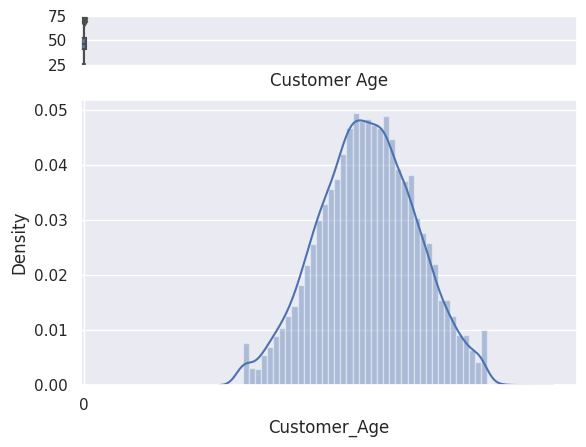

In [ ]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.set(style="darkgrid")

# Add a graph in each part
sns.boxplot(data["Customer_Age"], ax=ax_box)
sns.distplot(data["Customer_Age"], ax=ax_hist)
ax_box.set(xlabel='Customer Age')
plt.show()

### Q1.1 Credit_Limit Distribution
Create a boxplot stacked on top of a density distribution plot for 'Credit_Limit.' Comment on what this chart indicates.

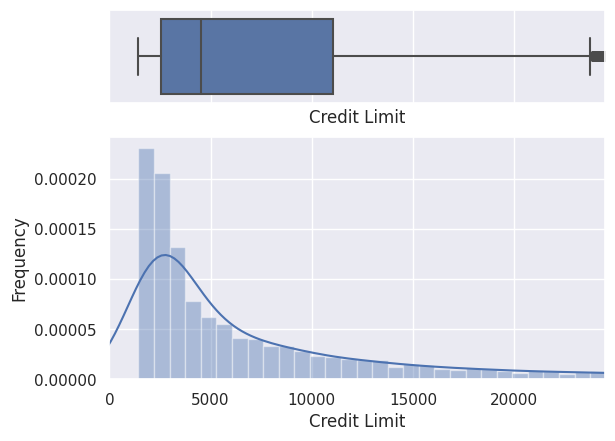

In [ ]:

fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.25, .65)})

sns.set(style="darkgrid")

# Creating a boxplot
sns.boxplot(x=data["Credit_Limit"], ax=ax_box) #boxplot
sns.distplot(data["Credit_Limit"], ax=ax_hist) #Distplot
ax_box.set(xlabel='Credit Limit')

ax_hist.set(ylabel='Frequency', xlabel='Credit Limit', xlim=(0, 24500))

plt.show()

when the credit_limit is from 0 to 5000 then we can observe the highest frequency of 0.0010

### Total_Trans_Ct Distribution
Create a boxplot stacked on top of a density distribution plot for 'Total_Trans_Ct.' Comment on what this chart indicates.

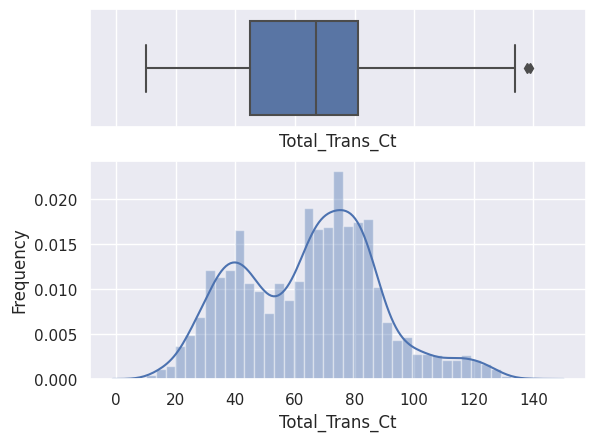

In [ ]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.35, .65)})
sns.set(style="darkgrid")

# Creating a boxplot
sns.boxplot(x=data["Total_Trans_Ct"], ax=ax_box)

# Creating a distribution plot

sns.distplot(data["Total_Trans_Ct"], ax=ax_hist) #distplot
ax_box.set(xlabel='Total_Trans_Ct')
ax_hist.set(ylabel='Frequency', xlabel='Total_Trans_Ct') #histogram

plt.show()

The peak frequency is observed at more than 0.015 at total trans range 60-100
when the total trans value is from 20 to 50 then the frew is from 0.010

### Observations on Total_Trans_Amt
Create a boxplot stacked on top of a density distribution plot for 'Total_Trans_Amt.' Comment on what this chart indicates.

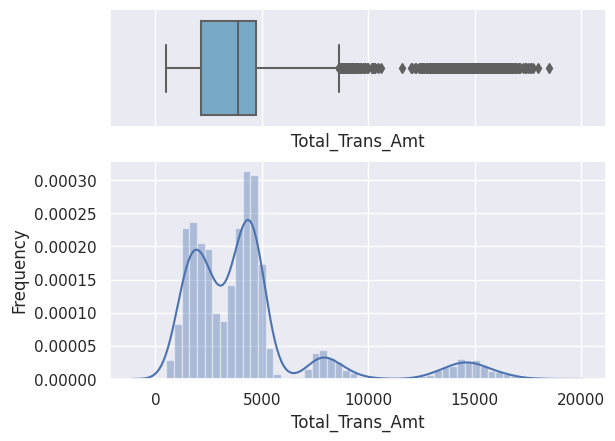

In [ ]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.35, .65)})

sns.set(style="darkgrid")
# For boxplot
sns.boxplot(x=data["Total_Trans_Amt"], ax=ax_box,palette="Blues")

sns.distplot(data["Total_Trans_Amt"], ax=ax_hist) #distplot
ax_box.set(xlabel='Total_Trans_Amt')
ax_hist.set(ylabel='Frequency', xlabel='Total_Trans_Amt') #histogram

plt.show()

The peak frequency is observed when total trans range is between 0 to 5000.
The freq peaked at 0.025 approx when the trans value is around 5000

### Correlation Matrix
Create a heatmap of the correlation matrix using spectral shading.

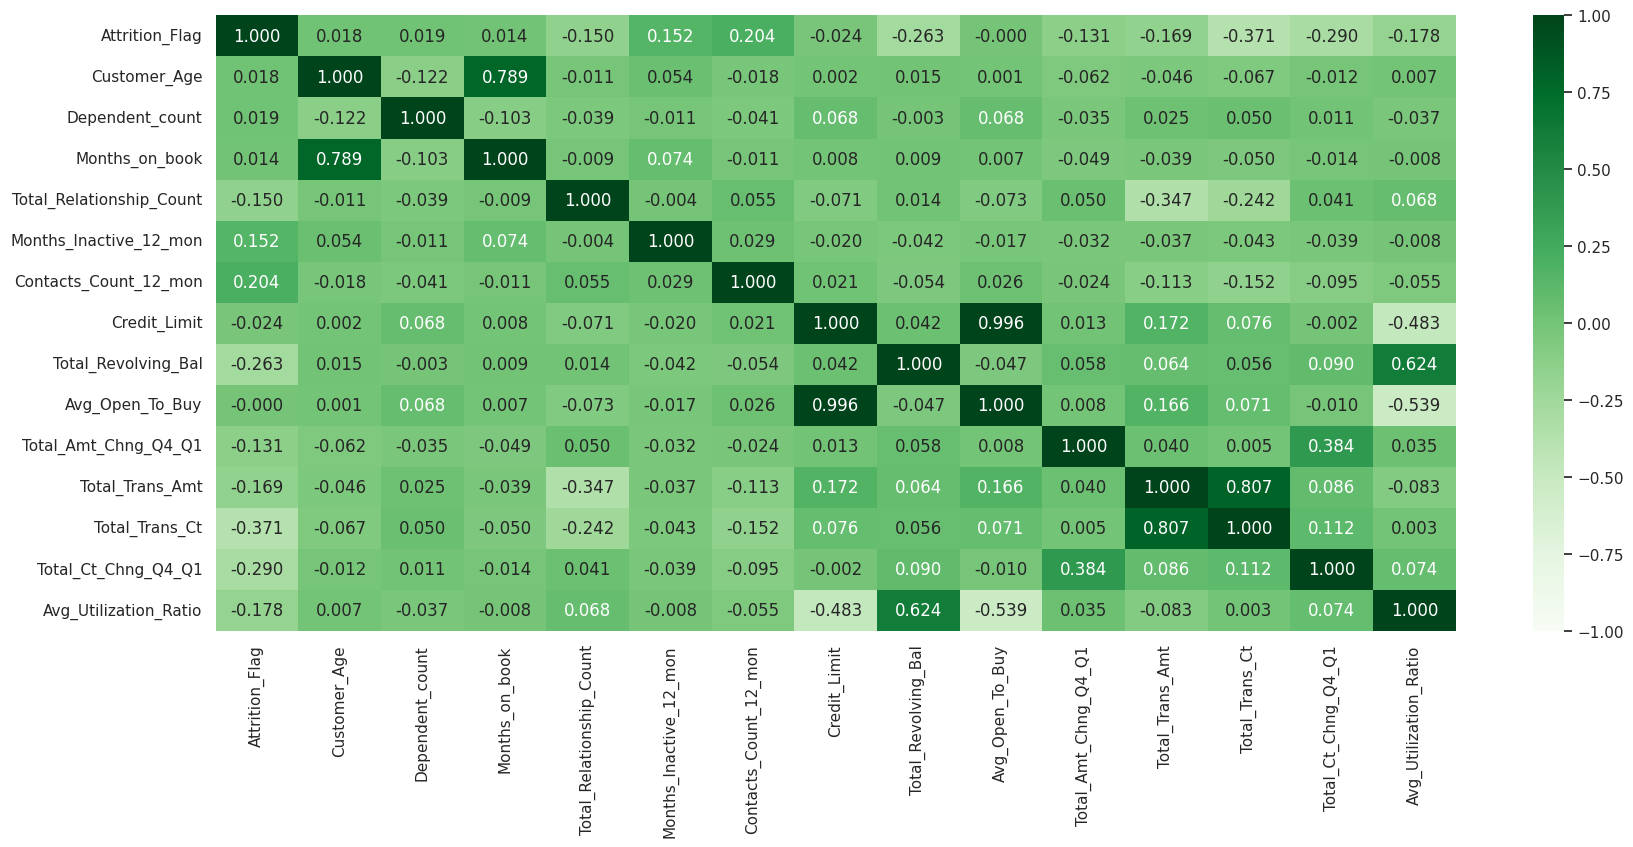

In [ ]:
co_matrix=data.corr()
plt.figure(figsize=(20, 8))
sns.heatmap(co_matrix, cmap='Greens', annot=True, fmt=".3f", vmin=-1, vmax=1, center=0)
plt.show()

### Attrition_Flag vs Income_Category
Create barchart to visualize 'Income_Category' on the x-axis and the percentage attrition in the y-axis. Shade by whether or not the customer attrites. Comment on what this chart indicates.

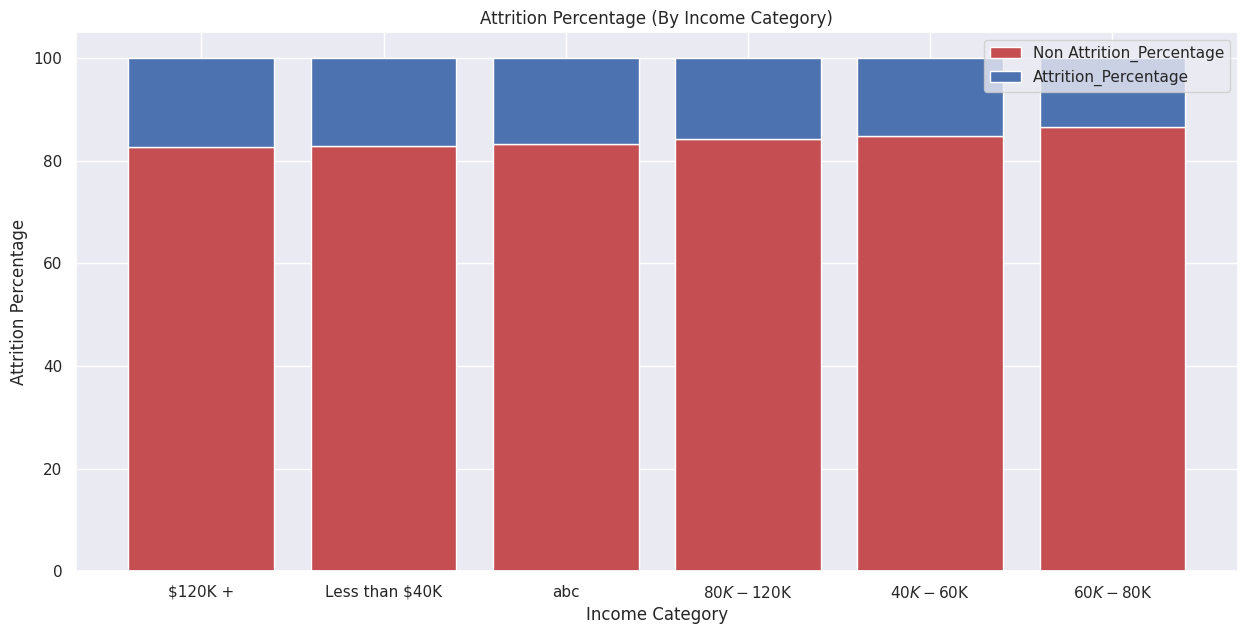

In [ ]:
income_viz = (
    data.groupby('Income_Category')['Attrition_Flag']
    .value_counts(normalize=True)
    .unstack(fill_value=0)
)
income_viz['Attrition_Percentage'] = income_viz[1].apply(lambda x: x * 100)
income_viz['Non Attrition_Percentage'] = income_viz[0].apply(lambda x: x * 100)
income_viz.sort_values(by='Attrition_Percentage', ascending=False,inplace=True)
# Create a bar chart
plt.figure(figsize=(15, 7))
plt.bar(income_viz.index,income_viz['Non Attrition_Percentage'], color='r')
plt.bar(income_viz.index,income_viz['Attrition_Percentage'], bottom=income_viz['Non Attrition_Percentage'] ,color='b')
plt.legend(['Non Attrition_Percentage','Attrition_Percentage'])
plt.xlabel('Income Category')
plt.ylabel('Attrition Percentage')
plt.title('Attrition Percentage (By Income Category)')

# Show the plot
plt.show()

we observe that the non attrition percantage is less than compared to attrition percentage value. and attrition percentage is high for 120+

In [ ]:
income_viz
plt.figure(figsize=(15, 7))
(, y1, color='r')

plt.show()


Attrition_Flag,0,1,Attrition_Percentage
Income_Category,,,
$120K +,0.82669,0.17331,17.33150
Less than $40K,0.82814,0.17186,17.18618
abc,0.83183,0.16817,16.81655
$80K - $120K,0.84235,0.15765,15.76547
$40K - $60K,0.84860,0.15140,15.13966
$60K - $80K,0.86519,0.13481,13.48074


### Attrition_Flag vs Card_Category
Create barchart to visualize 'Card_Category' on the x-axis and the percentage attrition in the y-axis. Shade by whether or not the customer attrites. Comment on what this chart indicates.

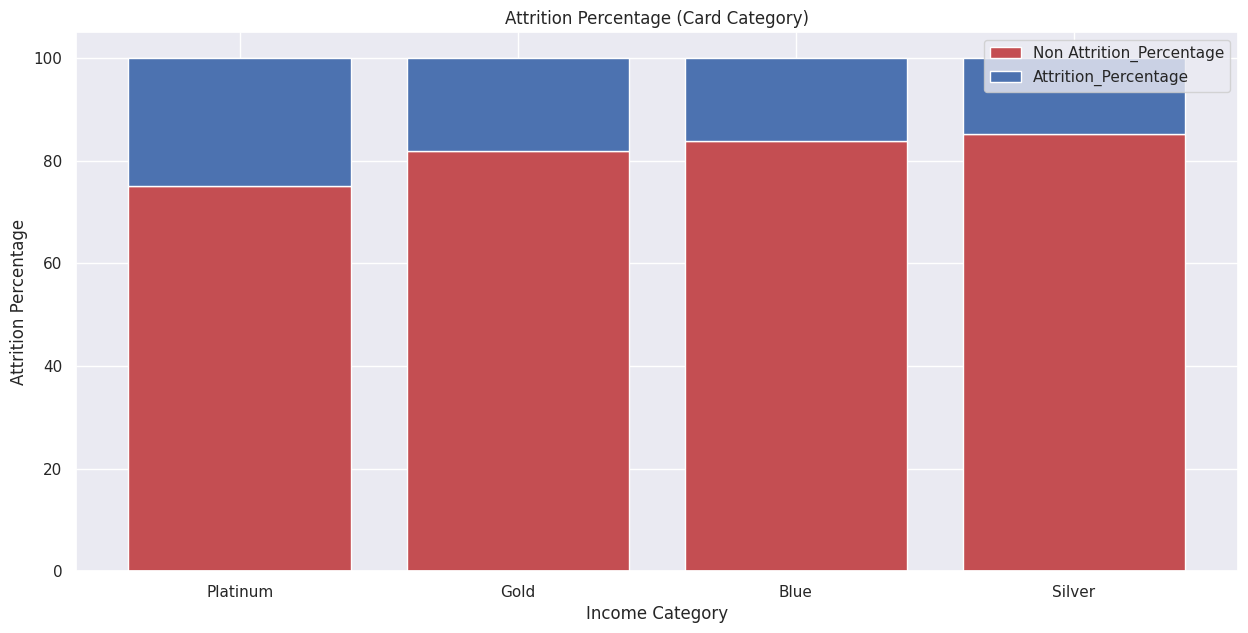

In [ ]:
income_viz = (
    data.groupby('Card_Category')['Attrition_Flag']
    .value_counts(normalize=True)
    .unstack(fill_value=0)
)
income_viz['Attrition_Percentage'] = income_viz[1].apply(lambda x: x * 100)
income_viz['Non Attrition_Percentage'] = income_viz[0].apply(lambda x: x * 100)
income_viz.sort_values(by='Attrition_Percentage', ascending=False,inplace=True)
# Create a bar chart
plt.figure(figsize=(15, 7))
plt.bar(income_viz.index,income_viz['Non Attrition_Percentage'], color='r')
plt.bar(income_viz.index,income_viz['Attrition_Percentage'], bottom=income_viz['Non Attrition_Percentage'] ,color='b')
plt.legend(['Non Attrition_Percentage','Attrition_Percentage'])
plt.xlabel('Card Category')
plt.ylabel('Attrition Percentage')
plt.title('Attrition Percentage (Card Category)')

# Show the plot
plt.show()


In [ ]:
data.groupby('Card_Category')['Attrition_Flag'].mean()

Card_Category
Blue       0.16098
Gold       0.18103
Platinum   0.25000
Silver     0.14775
Name: Attrition_Flag, dtype: float64

we can observe the attrition percentage is more in platinum then compared to any other and the silver has least percentage   

### Attrition_Flag vs Months_Inactive_12_mon
Create barchart to visualize 'Months_Inactive_12_mon' on the x-axis and the percentage attrition in the y-axis. Shade by whether or not the customer attrites. Comment on what this chart indicates.

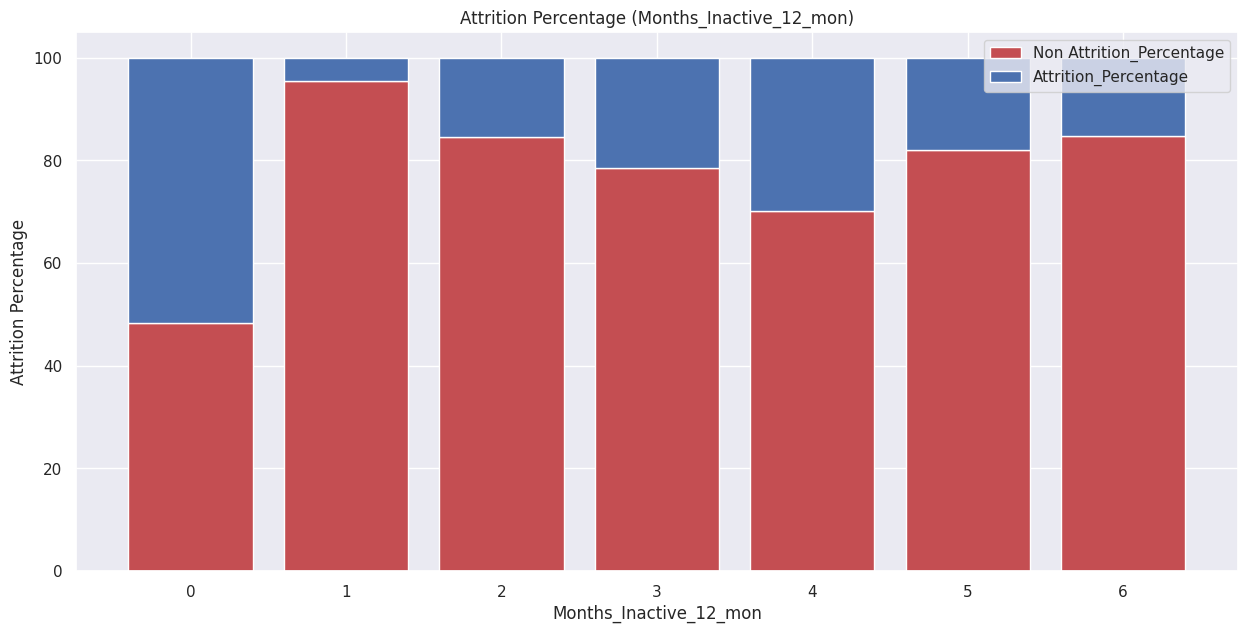

In [ ]:
income_viz = (
    data.groupby('Months_Inactive_12_mon')['Attrition_Flag']
    .value_counts(normalize=True)
    .unstack(fill_value=0)
)
income_viz['Attrition_Percentage'] = income_viz[1].apply(lambda x: x * 100)
income_viz['Non Attrition_Percentage'] = income_viz[0].apply(lambda x: x * 100)
income_viz.sort_values(by='Attrition_Percentage', ascending=False,inplace=True)
# Create a bar chart
plt.figure(figsize=(15, 7))
plt.bar(income_viz.index,income_viz['Non Attrition_Percentage'], color='r')
plt.bar(income_viz.index,income_viz['Attrition_Percentage'], bottom=income_viz['Non Attrition_Percentage'] ,color='b')
plt.legend(['Non Attrition_Percentage','Attrition_Percentage'])
plt.xlabel('Months_Inactive_12_mon')
plt.ylabel('Attrition Percentage')
plt.title('Attrition Percentage (Months_Inactive_12_mon)')

# Show the plot
plt.show()

The attrition percentage to non attriotion ratio is really more in 0 then compared to any other bar. The attrition percentage is almost 50 equivalent to non attrition value. 1 having the least attrition percantege

## Data Preparation

### Outlier Analysis

In [ ]:
Q1 = data.quantile(0.25)  # To find the 25th percentile and 75th percentile.
Q3 = data.quantile(0.75)

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

lower = (
    Q1 - 1.5 * IQR
)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

In [ ]:
(
    (data.select_dtypes(include=["float64", "int64"]) < lower)
    | (data.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(data) * 100

Attrition_Flag             16.06596
Customer_Age                0.01975
Dependent_count             0.00000
Months_on_book              3.81159
Total_Relationship_Count    0.00000
Months_Inactive_12_mon      3.26849
Contacts_Count_12_mon       6.21112
Credit_Limit                9.71660
Total_Revolving_Bal         0.00000
Avg_Open_To_Buy             9.50923
Total_Amt_Chng_Q4_Q1        3.91034
Total_Trans_Amt             8.84764
Total_Trans_Ct              0.01975
Total_Ct_Chng_Q4_Q1         3.89059
Avg_Utilization_Ratio       0.00000
dtype: float64

### Missing Value Imputation
- We will first replace 'abc' values with 'np.nan' in Income_Category
- We will impute missing values in all 3 columns using mode

In [ ]:
data1 = data.copy()

In [ ]:
data1["Income_Category"].replace("abc", np.nan, inplace=True)

In [ ]:
data1.isna().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

* Values have been replaced.

In [ ]:
imputer = SimpleImputer(strategy="most_frequent")

In [ ]:
X = data1.drop(["Attrition_Flag"], axis=1)
y = data1["Attrition_Flag"]

In [ ]:
#splitting the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

In [ ]:
reqd_col_for_impute = ["Education_Level", "Marital_Status", "Income_Category"]

In [ ]:
# Fit and transform the train data
X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])

# Transform the test data
X_test[reqd_col_for_impute] = imputer.transform(X_test[reqd_col_for_impute])

In [ ]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

* All missing values have been treated.

In [ ]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)


F    3770
M    3318
Name: Gender, dtype: int64
******************************
Graduate         3247
High School      1425
Uneducated       1031
College           709
Post-Graduate     364
Doctorate         312
Name: Education_Level, dtype: int64
******************************
Married     3815
Single      2771
Divorced     502
Name: Marital_Status, dtype: int64
******************************
Less than $40K    3273
$40K - $60K       1254
$80K - $120K      1084
$60K - $80K        974
$120K +            503
Name: Income_Category, dtype: int64
******************************
Blue        6621
Silver       375
Gold          78
Platinum      14
Name: Card_Category, dtype: int64
******************************


In [ ]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

F    3770
M    3318
Name: Gender, dtype: int64
******************************
Graduate         3247
High School      1425
Uneducated       1031
College           709
Post-Graduate     364
Doctorate         312
Name: Education_Level, dtype: int64
******************************
Married     3815
Single      2771
Divorced     502
Name: Marital_Status, dtype: int64
******************************
Less than $40K    3273
$40K - $60K       1254
$80K - $120K      1084
$60K - $80K        974
$120K +            503
Name: Income_Category, dtype: int64
******************************
Blue        6621
Silver       375
Gold          78
Platinum      14
Name: Card_Category, dtype: int64
******************************


### Encoding Categorical Variables

In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_test.shape)

(7088, 29) (3039, 29)


* After encoding there are 29 columns.

In [ ]:
X_train.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
4124,50,1,43,6,1,2,7985.00000,0,7985.00000,1.03200,3873,72,0.67400,0.00000,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
4686,50,0,36,3,3,2,5444.00000,2499,2945.00000,0.46800,4509,80,0.66700,0.45900,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1276,26,0,13,6,3,4,1643.00000,1101,542.00000,0.71300,2152,50,0.47100,0.67000,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0
6119,65,0,55,3,3,0,2022.00000,0,2022.00000,0.57900,4623,65,0.54800,0.00000,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2253,46,3,35,6,3,4,4930.00000,0,4930.00000,1.01900,3343,77,0.63800,0.00000,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0


## Model Building

### Model Evaluation Criterion
What 2 cases of predictions can the model predict incorrectly? Which case is more important? What does this mean for recall and false negatives (increasing or decreasing)?

False Positives occurs when the model wrongly predicts - that a customer will leave (attrite) when, in fact, they don't leave. Having more false positives can make the model's predictions less accurate and decrease its precision.

False Negatives happens when the model in-correctly predicts that a customer won't leave, but they do leave. This can be problematic for a bank because it means missing customers who actually leave. False negatives directly affect the model's ability to capture all the real attritions, reducing its recall.

### Logistic Regression
Train a logistic regression model using all predictors.

In [ ]:
'''
#data_lr = data.copy()
num_cols=['Customer_Age', 'Months_on_book', 'Credit_Limit', 'Total_Revolving_Bal',
          'Avg_Open_To_Buy','Total_Trans_Ct','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']
data_lr = pd.DataFrame(data, columns = num_cols)
print(data_lr.dtypes)
X = data_lr
y= data['Attrition_Flag']


#X = data_lr.drop(columns=["Attrition_Flag"],axis=1)
#Creating numerical columns
X= data_lr(columns=num_cols)
# Define the target variable
y = data_lr["Attrition_Flag"]
'''

'\n#data_lr = data.copy()\nnum_cols=[\'Customer_Age\', \'Months_on_book\', \'Credit_Limit\', \'Total_Revolving_Bal\',\n          \'Avg_Open_To_Buy\',\'Total_Trans_Ct\',\'Total_Amt_Chng_Q4_Q1\',\'Total_Trans_Amt\',\'Total_Ct_Chng_Q4_Q1\',\'Avg_Utilization_Ratio\']\ndata_lr = pd.DataFrame(data, columns = num_cols)\nprint(data_lr.dtypes)\nX = data_lr\ny= data[\'Attrition_Flag\']\n\n\n#X = data_lr.drop(columns=["Attrition_Flag"],axis=1)\n#Creating numerical columns\nX= data_lr(columns=num_cols) \n# Define the target variable\ny = data_lr["Attrition_Flag"] \n'

In [ ]:
data['Attrition_Flag']

0        0
1        0
2        0
3        0
4        0
        ..
10122    0
10123    1
10124    1
10125    1
10126    1
Name: Attrition_Flag, Length: 10127, dtype: int64

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
data_lr = LogisticRegression()
data_lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
X_train.shape

(7088, 29)

In [ ]:
y_pred = data_lr.predict(X_test)

### Evaluation Metrics
Create a function to calculate and print the classification report and confusion matrix.

In [ ]:
from sklearn import metrics
#from sklearn import metrics
def print_metrics(y1, y2):
    accuracy = metrics.accuracy_score(y1, y2)
    precision = metrics.precision_score(y1, y2)
    recall = metrics.recall_score(y1, y2)
    cm_matrix = metrics.confusion_matrix(y1, y2)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print('')
    cls_report = classification_report(y1, y2)
    print("Classification Report: \n", cls_report)
    print('')
    print("confusion_matrix : \n", cm_matrix)
    print('')
    sns.heatmap(cm_matrix, cmap='YlGnBu',annot=True, fmt='.3f', xticklabels=['Not Attrite', 'Attrite'], yticklabels=['Not Attrite', 'Attrite'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.figure(figsize=(10, 7))
    plt.show()



###  Check Performance on Training Data
Check the performance on your training data using the function you created. Comment on what your class of interest is, and how to read the confusion matrix.

Reports on Training data: 

Accuracy: 0.8779627539503386
Precision: 0.6902777777777778
Recall: 0.4363476733977173

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      5949
           1       0.69      0.44      0.53      1139

    accuracy                           0.88      7088
   macro avg       0.79      0.70      0.73      7088
weighted avg       0.87      0.88      0.87      7088


confusion_matrix : 
 [[5726  223]
 [ 642  497]]



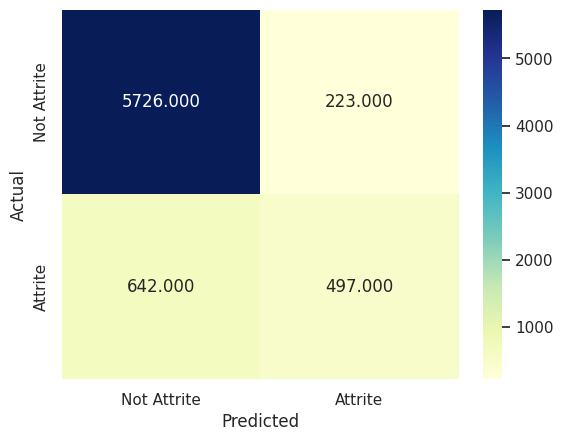

<Figure size 1000x700 with 0 Axes>

In [ ]:
y_pred = data_lr.predict(X_train)
#y_prob = data_lr.predict_proba(X_test)[:, 1]
# Define a custom threshold (e.g., 0.3)
#custom_threshold = 0.3
print("Reports on Training data: \n")
print_metrics(y_train, y_pred)

The confusion-matrix gives a breakdown of the model- predictions

The model's accuracy is 87%/0.878 which sheds light on the overall correct predictions.

Precision, at 0.690, indicates that when the model predicts Class then it stands correct at 69% or 0.69 prob .

Recall, with a value of 0.436 shows that the model indentifies only about 43% of the actual positive-cases which indicates that 57% of the time it misses them.


In conclusion, the confusion-matrix offers insights about the model's performance in terms of true-positives/false-positives/true-negatives and false -negatives.

In [ ]:
''' y_train_pred = data_lr.predict_proba(X_train)[:, 1]
print("Performance on Training Data:")
print(" ")
custom_threshold = 0.3
print_metrics(y_train, (y_train_pred >= custom_threshold).astype(int)) '''

' y_train_pred = data_lr.predict_proba(X_train)[:, 1]\nprint("Performance on Training Data:")\nprint(" ")\ncustom_threshold = 0.3\nprint_metrics(y_train, (y_train_pred >= custom_threshold).astype(int)) '

### Check Performance on Test Data
Check the performance on your test data using the function you created.

In [ ]:
y_pred_test = data_lr.predict(X_test)

Reports on performance of test data: 

Accuracy: 0.8798947022046726
Precision: 0.7016393442622951
Recall: 0.4385245901639344

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      2551
           1       0.70      0.44      0.54       488

    accuracy                           0.88      3039
   macro avg       0.80      0.70      0.74      3039
weighted avg       0.87      0.88      0.87      3039


confusion_matrix : 
 [[2460   91]
 [ 274  214]]



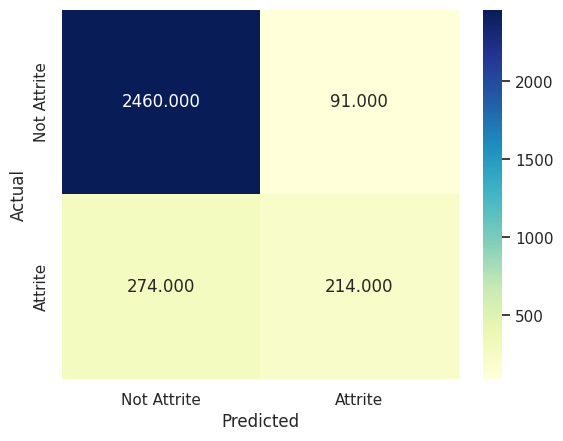

<Figure size 1000x700 with 0 Axes>

In [ ]:
print('Reports on performance of test data: \n')
print_metrics(y_test,y_pred_test)

### Comments on Performance
Comment on the accuracy of your train and test dataset. What is the recall for this model? What does the recall indicate on the overall model performance? Does this model identify the majority of the customers who wiill attrite?


The accuracy and precision are nearly equal but the training data has an edge over test data
Low recall means the model misses many customers who will actually leave.

*It's really important for the business to catch as many leaving customers as possible, we need to make the model better at that (especially at recall).With this model we can reduce the false positive errors by great number.

*To do that, we might need to try different ways or techniques to improve the model so that it doesn't miss so many customers who are leaving.



## Performance Evaluation

### Evaluate Predictors
Print the coefficients of the logistic regression and comment on which variables are leading to attrition.

In [ ]:
coef= pd.DataFrame()

In [ ]:
coef["columns"]=X_train.columns
coef["coeff"]=data_lr.coef_[0]
coef.sort_values(by="coeff",ascending=False)

,columns,coeff
5,Contacts_Count_12_mon,0.31531
4,Months_Inactive_12_mon,0.24919
1,Dependent_count,0.20002
0,Customer_Age,0.11755
25,Income_Category_Less than $40K,0.05269
21,Marital_Status_Single,0.04579
16,Education_Level_Graduate,0.01085
18,Education_Level_Post-Graduate,0.00870
15,Education_Level_Doctorate,0.00737
19,Education_Level_Uneducated,0.00455


Features with large positive coefficients are more likely associated with attrition whereas features with larg negative coefficients are more negatively associated with attrition

### Odds Calculation
Convert the coefficients of the logistic regression model to odds. Comment on the odds of customer attrition when it comes to contacting the bank, being inactive, and being dependent.

In [ ]:
import math
coef["odds"]=math.e**(coef["coeff"])
# converting the coeff to odds


coef

,columns,coeff,odds
0,Customer_Age,0.11755,1.12474
1,Dependent_count,0.20002,1.22143
2,Months_on_book,-0.09103,0.91299
3,Total_Relationship_Count,-0.21321,0.80799
4,Months_Inactive_12_mon,0.24919,1.28299
5,Contacts_Count_12_mon,0.31531,1.37069
6,Credit_Limit,-0.00035,0.99965
7,Total_Revolving_Bal,-0.00068,0.99932
8,Avg_Open_To_Buy,0.00034,1.00034
9,Total_Amt_Chng_Q4_Q1,-0.01180,0.98827


It can be said that if the contact increases by 1 , keeping all other factors constant the attrittion odds is modified by a factor of 1.37069 and one increment in dependent count modifies the odds of attrition by a factor of
1.22443

### Precision-Recall Curve
Create a precision-recall curve for your logistic regression model.

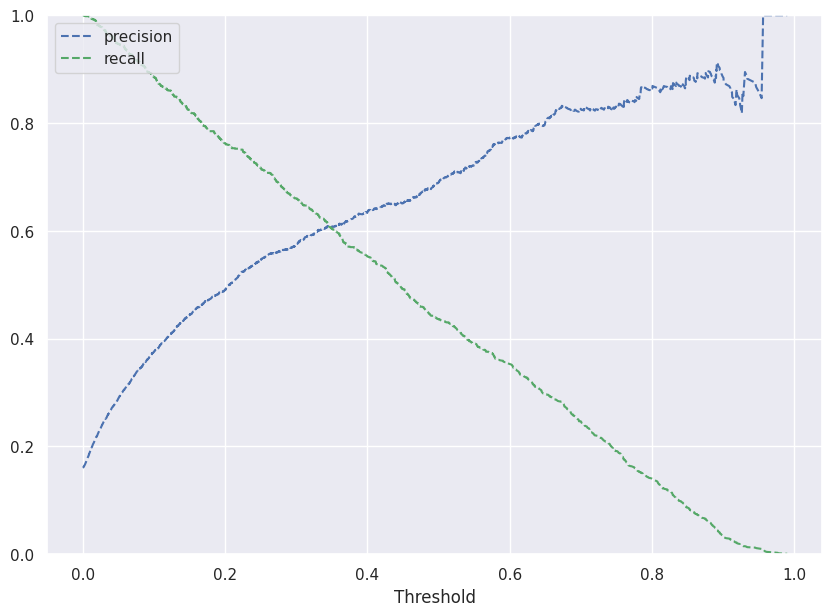

In [ ]:
y_scores_lg=data_lr.predict_proba(X_train)

precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:,1])

#Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

### Threshold Calculation
Calculate the threshold where precision and recall are equal.

In [ ]:
#calculating the exact threshold where precision and recall are equal.4rdc
for i in range(len(precisions_lg)):
    if precisions_lg[i] == recalls_lg[i]:
        print(thresholds_lg[i])
        custom_threshold = thresholds_lg[i]

0.34806960434560535


In [ ]:
custom_threshold

0.34806960434560535

### Re-Evaluate Performance on Training Data
Re-evaluate your model on the training data using the identified optimal threshold. Comment on the model performance.

Performance on Training Data using optimal threshold: 

Accuracy: 0.873589164785553
Precision: 0.6066725197541704
Recall: 0.6066725197541704

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      5949
           1       0.61      0.61      0.61      1139

    accuracy                           0.87      7088
   macro avg       0.77      0.77      0.77      7088
weighted avg       0.87      0.87      0.87      7088


confusion_matrix : 
 [[5501  448]
 [ 448  691]]



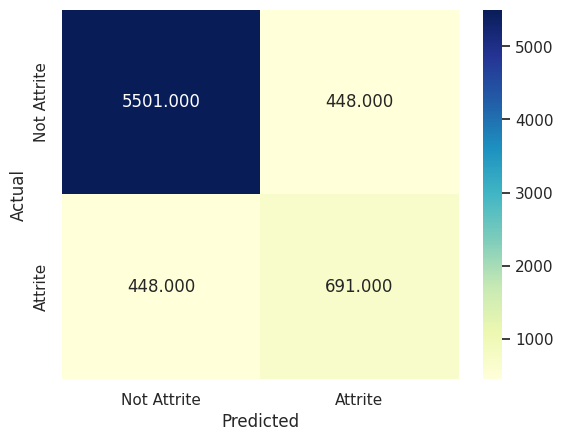

<Figure size 1000x700 with 0 Axes>

In [ ]:
y_train_pred = data_lr.predict_proba(X_train)[:, 1]
print("Performance on Training Data using optimal threshold: \n")
y_train_pred_threshold = (y_train_pred >= custom_threshold).astype(int)
print_metrics(y_train, y_train_pred_threshold)

Accuracy: The accuracy of the model after identifying threshold is slightly lower (0.8736) compared to the model before 0.3 threshold value (0.8780) on the training data. This means that the model with the identifying threshold makes less correct predictions overall.

Precision: The precision of the model after identifying threshold is lower (0.6067) compared to the model before 0.3 threshold value (0.6903) on the training data. This means that the model with the identifying threshold makes more false positive errors.

Recall: The recall of the model after identifying threshold is higher (0.6067) compared to the model before identifying threshold (0.4363) on the training data. This= means that the model with the adjusted threshold is better at detecting the actual/real positive-cases.                               

The model before adjusting the threshold has better precision, meaning it's good at avoiding false alarms, but it may miss some real positive cases.

### Re-Evaluate Performance on Test Data
Re-evaluate your model on the test data using the identified optimal threshold. Comment on the model performance. How does the model's performance compare to the model prior to adjusting the threshold?

In [ ]:
y_prob = data_lr.predict_proba(X_test)[:, 1]
y_pred_custom = (y_prob >= custom_threshold).astype(int)

Reports on test data using the identified optimal threshold: 

Accuracy: 0.8759460348798948
Precision: 0.6163522012578616
Recall: 0.6024590163934426

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.93      0.93      2551
           1       0.62      0.60      0.61       488

    accuracy                           0.88      3039
   macro avg       0.77      0.77      0.77      3039
weighted avg       0.87      0.88      0.88      3039


confusion_matrix : 
 [[2368  183]
 [ 194  294]]



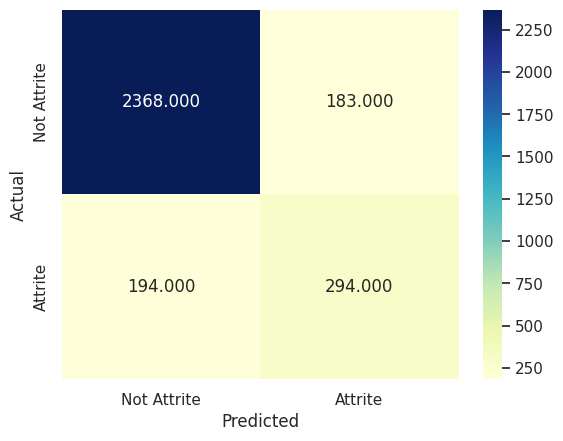

<Figure size 1000x700 with 0 Axes>

In [ ]:
print('Reports on test data using the identified optimal threshold: \n')
print_metrics(y_test,y_pred_custom)

The model after identifying the threshold has high precision which indicates fewer false-positive errors.
Yet, we can see the re-the model (with identified threshold) has low recall which indicates that the chances of missing more actual positive cases. The precission and recall does not go hand in hand.
Thus,choosing the right model depends on the specific objectives and constraints of the problem.                                                   

---

If reducing false positives is our atmost priority then the model with the identified threshold (0.34..) might be preferred.                        
However, if all actual positive cases is needed/crucial then the original model might be more suitable even-though it has low precision value.